In [1]:
%%capture
## [TEMPLATE BEGIN]
## おまじない：実行中のノートブック名からOUTPUT_DIRを決めるコード
from pathlib import Path
from IPython import get_ipython; ip = get_ipython()
if '__vsc_ipynb_file__' in ip.user_ns:
    ## VS Codeで実行されている場合
    THIS_NOTEBOOK_PATH = Path(ip.user_ns['__vsc_ipynb_file__'])
else:
    !pip install ipynbname
    import ipynbname; THIS_NOTEBOOK_PATH = Path(ipynbname.path())
    if "%2F" in THIS_NOTEBOOK_PATH.stem:
        ## Google Colabで実行されている場合
        colab_ip = %system hostname -I   # uses colab magic to get list from bash
        colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
        colab_port = 9000                # could use 6000, 8080, or 9000
        import requests
        filename = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
        THIS_NOTEBOOK_PATH = Path(filename)
    else:
        ## それ以外の場合
        THIS_NOTEBOOK_PATH = THIS_NOTEBOOK_PATH

OUTPUT_DIR = Path("figures") / THIS_NOTEBOOK_PATH.stem
## [TEMPLATE END]

In [2]:
print("File output directory:", OUTPUT_DIR)
# Create the output directory if it does not exist
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

File output directory: figures/_gaussian_kernel


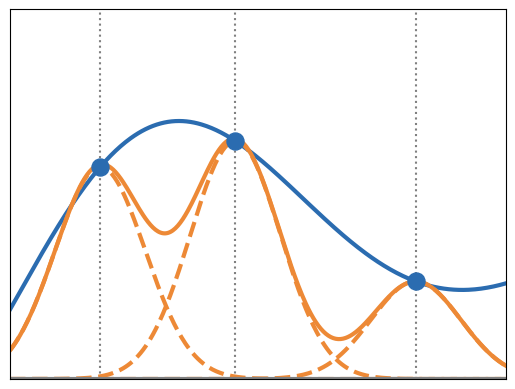

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Approximation target function
def target_function(x):
    return np.sin(x) * np.exp(-0.2 * x) + 1

# Create a wider range of x values with specified axis limits
x = np.linspace(-0.5, 5, 400)

# Create y values for the target function
y_target = target_function(x)

# Define points for Gaussian kernels and their corresponding true function values
points = [0.5, 2.0, 4.0]
y_points = target_function(np.array(points))
h = 0.5  # Bandwidth for Gaussian kernels

# Gaussian kernel function
def gaussian_kernel(x, mu, h):
    return np.exp(-((x - mu)**2) / (2 * h**2))

# Create y values for the scaled Gaussian kernels
scaled_gaussians = [y_points[i] * gaussian_kernel(x, points[i], h) for i in range(len(points))]

# Sum of the Gaussian functions
gaussian_sum = np.sum(scaled_gaussians, axis=0)

# Define the colors
blue_color_hex = '#2B6CB0'  # Example hex code for blue color from the image
orange_color_hex = '#ED8936'  # Example hex code for orange color from the image

# Plot the target function
plt.plot(x, y_target, color=blue_color_hex, linewidth=3)

# Plot the scaled Gaussian kernels
for i, p in enumerate(points):
    plt.plot(x, scaled_gaussians[i], linestyle='dashed', color=orange_color_hex, linewidth=3)

# Plot the sum of the Gaussian functions
plt.plot(x, gaussian_sum, color=orange_color_hex, linewidth=3)

# Mark the points where Gaussian kernels are placed
for i, p in enumerate(points):
    plt.axvline(x=p, linestyle='dotted', color='gray')
    plt.scatter(p, y_points[i], color=blue_color_hex, s=150, marker='o', zorder=5)  # Increase scatter point size and bring to front

# Adjust axis
plt.ylim(0, 2.5)
plt.xlim(-0.5, 5)
plt.axhline(y=0, color='gray', linestyle='-', linewidth=3)

# Remove axis labels and ticks
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.gca().set_xticks([])
plt.gca().set_yticks([])

# Save the figure
plt.savefig(OUTPUT_DIR / 'gaussian_kernel.png', bbox_inches="tight")

plt.show()